# Recommender System

In [0]:
# importing required libraries
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

plt.switch_backend('agg')


In [41]:
user = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/users.csv'
userData = pd.read_csv(user)
userData

,id,name,username,email,image,provider,provider_id,password,remember_token,created_at,updated_at,short_bio
0,1,Eniayomi Oluwaseyi,eniayomi,oluwaseyieniayomi@gmail.com,/storage/oluwaseyieniayomi/images//5lxMjdbOVca...,google,100892238782850407484,NaN,79kIhqDiWzqx1i3eFpGMpxfLdPVIvSfv8A3vN2PNEl4ig9...,2019-08-01 16:57:22,2019-08-01 16:57:22,Software Developer | DevOPs Engineer
1,2,Elijah Okokon,DMatrix,okoelijah@gmail.com,/storage/2/images//DB7axhFJpFUzPuCNPRMQ6X1iNwb...,google,105584000674868760138,NaN,Rz08FtDtdyAp8Cm5XJq5XumgZhEqytSu5MxxyHZYlHBhd0...,2019-08-01 17:05:58,2019-08-01 17:05:58,Web Developer
2,3,Jeffrey Ogah,jeff.ogah,jeff.ogah@gmail.com,https://lh3.googleusercontent.com/-FQgpN5l_UoY...,google,101235103722282698796,NaN,ZxNMYG05B6RQuSWaJlqlc8bGbPyFxNGNnNf5D86biFix4G...,2019-08-01 19:55:39,2019-08-01 19:55:39,Front End Developer | React Developer | Mentor...
3,4,Oluwaseyi Oluwapelumi,nathan,nathanoluwaseyi@gmail.com,/storage/4/images/thumbnail/TLWSEBK7C-UMECCGUP...,google,107233455544779563919,NaN,uxbOXr4Cw8tJyilWDKQRhi7TjiV7gBzjMnX0cb4i3ndFu6...,2019-08-02 15:52:47,2019-08-02 15:52:47,| Software Developer | DevOps Engineer | @linu...
4,5,PoRH,lamar,paulchibiukeigweze@gmail.com,/storage/5/images/thumbnail/images (2)_small_1...,google,103431607062264005570,NaN,EeCB77oXHo3zdZgYTVhWlw2EyHkTtLSJb2PjWFF9RuG7H1...,2019-08-03 10:33:51,2019-08-03 10:33:51,I Am lamar and you don't think am real?
5,6,Seyi Onifade,xyluz,hngtechapps@gmail.com,/storage/6/images//rz7EJJPo9rsLasTTvkty5SyafZq...,google,116097926947029837238,NaN,R6LyDlZrJxVsIo9rrPTS5jtN5cX7BCd21TLKqOTljvf0tk...,2019-08-03 17:03:12,2019-08-03 17:03:12,My Open Diary
6,7,Mark Essien,markessien,markessien@gmail.com,https://lh3.googleusercontent.com/-d-CUw8-fyH0...,google,111051541771480458062,NaN,SdRjEQ9gjQT6AHUnGC2OvMbV3BzPQlpkFZjSF2VtOwa4W6...,2019-08-04 08:39:24,2019-08-04 08:39:24,An engineer
7,8,Alex Moses,ahlesswywk,ahlesswywk@gmail.com,https://lh3.googleusercontent.com/-3KN69LfyXdM...,google,115281580007468538270,NaN,IX5teH5WuxA9oUrvBAgvgfNwtLnismEDd19h9TYw6DmEoD...,2019-08-06 10:20:05,2019-08-06 10:20:05,"Software Developer hotelsng, Ex. Frontend deve..."
8,9,Edmund Ekott,26th_edmund,edmund.timfon@gmail.com,https://lh5.googleusercontent.com/-f1FaeebpELE...,google,105660498325735598242,NaN,OLD8FDyisJweEFiDYIsNpd6MLrlKW5jZ1Of40YLDvpBrJt...,2019-08-08 10:24:01,2019-08-08 10:24:01,Front-end Engineer 💻 | FIFA advocate 🎮 | Ninja 🥋
9,10,Stefan aGz,stefanpongrz,stefanpongrz@gmail.com,https://lh3.googleusercontent.com/-_IQJPkk7tOU...,google,110527044765950957774,NaN,Yr8Ie8QwJevafGL1WryGBPCZZYd69uZfzc7419mFK1wDnS...,2019-08-10 11:17:43,2019-08-10 11:17:43,Here


In [42]:
notifications = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/notifications.csv'
notificationsData = pd.read_csv(notifications)
notificationsData

,id,post_id,parent_comment_id,comment,sender_id,user_id,status,action,type,created_at,updated_at
0,1,NaN,NaN,NaN,4,7,1,Followed,Following,2019-08-26 08:43:56,2019-08-26 17:20:28
1,2,NaN,NaN,NaN,1,4,1,Followed,Following,2019-08-26 08:48:21,2019-08-26 12:05:42
2,3,NaN,NaN,NaN,3,45,0,Followed,Following,2019-08-26 08:51:39,2019-08-26 08:51:39
3,5,NaN,NaN,NaN,1,4,1,Followed,Following,2019-08-26 10:32:46,2019-08-26 12:05:42
4,7,278.0,NaN,Hey bro!,1,4,1,Commented,Post,2019-08-26 14:13:17,2019-08-26 14:13:25
5,8,360.0,NaN,This is an interesting write-up. I have a ques...,3,7,1,Commented,Post,2019-08-26 17:10:20,2019-08-26 17:20:28
6,9,360.0,NaN,A nice write up,4,7,1,Commented,Post,2019-08-26 17:13:14,2019-08-26 17:20:28
7,10,NaN,NaN,NaN,3,363,0,Followed,Following,2019-08-26 17:31:56,2019-08-26 17:31:56
8,11,143.0,NaN,I have learnt how to publish an article and Ho...,2191,2191,0,Commented,Post,2019-08-26 17:44:23,2019-08-26 17:44:23
9,12,371.0,NaN,That's awesome,9,3,1,Commented,Post,2019-08-26 18:15:45,2019-08-27 10:15:03


In [43]:
posts = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/posts.csv'
postsData = pd.read_csv(posts)
postsData

,id,user_id,title,content,tags,slug,created_at,updated_at,image,status_id,action,post_id
0,1,2077,What i have learnt so far on HTML,I learnt how to use the table tag as i have us...,NaN,what-i-have-learnt-so-far-on-html-985,2019-08-25 18:39:01,2019-08-28 10:30:00,1,NaN,NaN,NaN
1,2,1719,HTML BEGINS HERE,"I am on this journey with start.ng, and here ...",Technology,html-begins-here-4d6,2019-08-25 18:44:36,2019-08-28 10:30:00,1,NaN,NaN,NaN
2,4,1310,My Laziness In The Open,I have not been attending classes on the HNG c...,NaN,my-laziness-in-the-open-029,2019-08-25 18:50:33,2019-08-28 10:30:00,1,NaN,NaN,NaN
3,6,1787,MY TASK 2,My journey on **StartNG** pre-internship progr...,NaN,my-task-2-649,2019-08-25 18:51:36,2019-08-28 10:30:00,1,NaN,NaN,NaN
4,7,167,Task 2,"A Summary on The “idongesit.html” CV, Its Str...",NaN,task-2-7e5,2019-08-25 18:51:39,2019-08-28 10:30:00,1,NaN,NaN,NaN
5,8,329,My Journey on HTML,Using the Hyper Text Markup Language (HTML) ha...,NaN,my-journey-on-html-ce5,2019-08-25 18:54:07,2019-08-28 10:30:34,1,NaN,NaN,NaN
6,9,2040,StartNG HTML Exposition,![](/storage/2040/images/img-kf6sy3kvg0.png)![...,NaN,startng-html-exposition-4d5,2019-08-25 18:55:20,2019-08-28 10:30:00,1,NaN,NaN,NaN
7,11,1787,MY TASK 2,My journey on **StartNG** pre-internship progr...,html,my-task-2-649,2019-08-25 18:57:59,2019-08-28 10:30:00,1,NaN,NaN,NaN
8,12,2040,StartNG HTML task,<p> </p>\n<p>I have learned a lot about HTML a...,NaN,startng-html-task-8e2,2019-08-25 19:01:15,2019-08-28 10:30:00,daraoloye99/images/img-gpzb56s7g1.png,NaN,NaN,NaN
9,13,2040,On StartNG Pre-Internship,**What I have learned so far**\n\nI have learn...,"StartNG pre-internship, Developer, Engineering...",on-startng-pre-internship-645,2019-08-25 19:01:15,2019-08-28 10:30:00,NaN,NaN,NaN,NaN


In [44]:
to_reads = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/to_reads.csv'
to_reads = pd.read_csv(to_reads)
to_reads

,user_id,post_id
0,1,280
1,1,994
2,2,981
3,2,982
4,2,984
5,2,987
6,2,988
7,2,989
8,3,361
9,3,362


In [45]:
to_reads = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/to_reads.csv'
to_reads = pd.read_csv(to_reads)
to_reads

,user_id,post_id
0,1,280
1,1,994
2,2,981
3,2,982
4,2,984
5,2,987
6,2,988
7,2,989
8,3,361
9,3,362


# Data Preprocessing

In [0]:
#reading in of csv
contact_settings = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/contact_settings.csv'
contact_settings = pd.read_csv(contact_settings)

extfeeds = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/extfeeds.csv'
extfeeds = pd.read_csv(extfeeds)

following = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/following.csv'
following = pd.read_csv(following)

maillists = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/maillists.csv'
maillists = pd.read_csv(maillists)

migrations = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/migrations.csv'
migrations = pd.read_csv(migrations)

thoughts = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/thoughts.csv'
thoughts = pd.read_csv(thoughts)

user_settings = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/user_settings.csv'
user_settings = pd.read_csv(user_settings)

In [47]:
thoughts.head()    #checking first 5 rows

,id,user_id,content,created_at,updated_at
0,1,2195,hhhhhhhh,2019-08-26 12:30:26,2019-08-26 12:30:26
1,2,148,Can't believe I'm learning ML,2019-08-26 12:57:35,2019-08-26 12:57:35
2,3,2212,- what you have learned so far\r\nI've learned...,2019-08-26 13:35:41,2019-08-26 13:35:41
3,4,1,Hey people,2019-08-26 14:12:07,2019-08-26 14:12:07
4,5,2223,nice,2019-08-26 14:24:55,2019-08-26 14:24:55


In [48]:
thoughts.nunique()  #checking  number of unique in each columns 

id            16
user_id       10
content       14
created_at    16
updated_at    16
dtype: int64

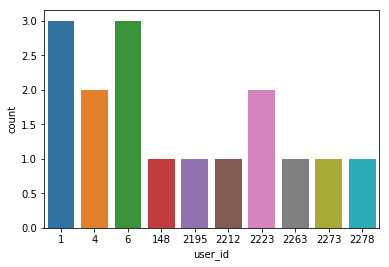

In [49]:
sns.countplot(x='user_id',data=thoughts) #this counts the amount of time a user_id appears

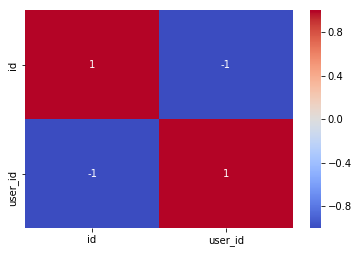

In [50]:
corr=thoughts.corr()
sns.heatmap(corr.corr(),cmap='coolwarm',annot=True)   #check if positively or negetively corrralated

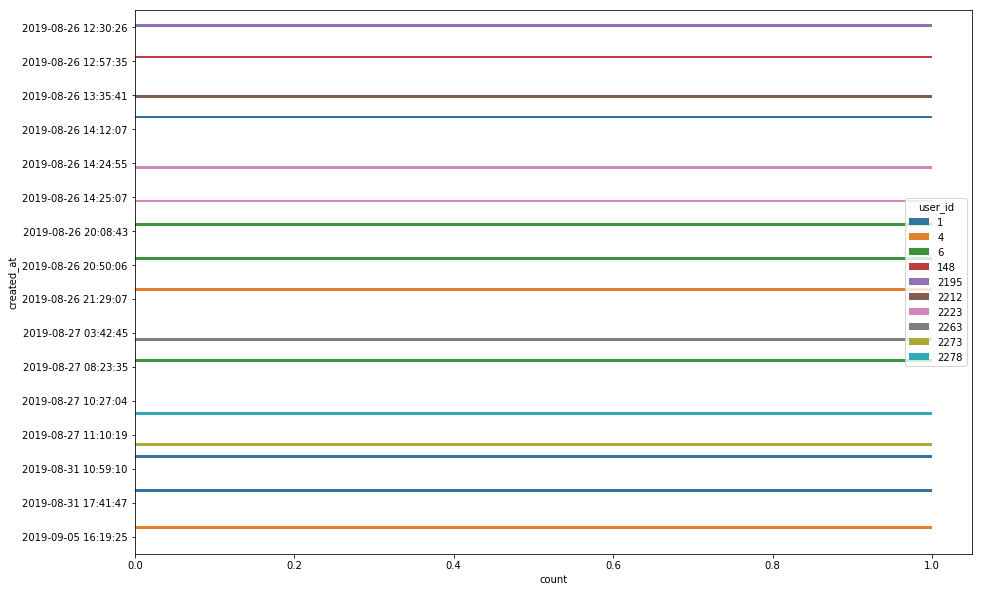

In [51]:
plt.figure(figsize = (15,10))
sns.countplot(y='created_at',hue ='user_id',data=thoughts) #counts the amount of created at was found also spliting it categories under user_id through hue

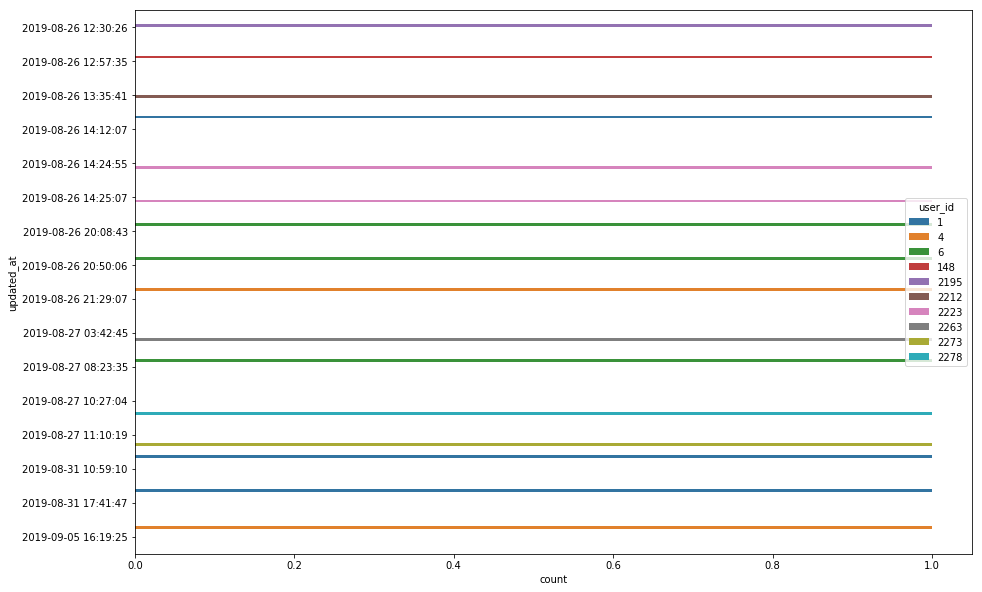

In [52]:
plt.figure(figsize = (15,10))
sns.countplot(y='updated_at',hue ='user_id',data=thoughts)

In [53]:
contact_settings.head()

,id,user_id,email,display_message,created_at,updated_at
0,1,78,emmanuelezenwigbo@gmail.com,Web Developer | Digital Marketer,NaN,NaN
1,2,90,dward009@gmail.com,Call me,NaN,NaN
2,3,53,apeji93@gmail.com,Yossi,NaN,NaN
3,4,133,ireabueke@gmail.com,NaN,NaN,NaN
4,5,92,bindas.fs@gmail.com,Contact me on that email,NaN,NaN


In [54]:
extfeeds.head()

,id,user_id,site,site_image,title,des,link,date,image,created_at,updated_at,tags
0,2839,2,Elijah Okokon,/storage/2/images//DB7axhFJpFUzPuCNPRMQ6X1iNwb...,with picture,,/post/with-picture-f36,"Sep 2nd, 2019 09:47 AM",/storage/2/images/img-rw5rbxsjg4.jpeg,NaN,NaN,NaN
1,2840,2,Elijah Okokon,/storage/2/images//DB7axhFJpFUzPuCNPRMQ6X1iNwb...,Your face PHP script,this is what you see\n\~~~php\n&lt;?php echo &...,/post/your-face-php-script-a2a,"Aug 31st, 2019 03:19 PM",NaN,NaN,NaN,NaN
2,2841,2,Elijah Okokon,/storage/2/images//DB7axhFJpFUzPuCNPRMQ6X1iNwb...,this is mine,mine,/post/this-is-mine-97b,"Aug 31st, 2019 12:03 PM",NaN,NaN,NaN,NaN
3,2842,2,Elijah Okokon,/storage/2/images//DB7axhFJpFUzPuCNPRMQ6X1iNwb...,this is a test post,i need this to work,/post/this-is-a-test-post-91c,"Aug 31st, 2019 09:29 AM",NaN,NaN,NaN,NaN
4,2843,2,Elijah Okokon,/storage/2/images//DB7axhFJpFUzPuCNPRMQ6X1iNwb...,This is lucid,I love this app,/post/this-is-lucid-9a6,"Aug 31st, 2019 09:29 AM",NaN,NaN,NaN,NaN


In [55]:
extfeeds.shape

(45, 12)

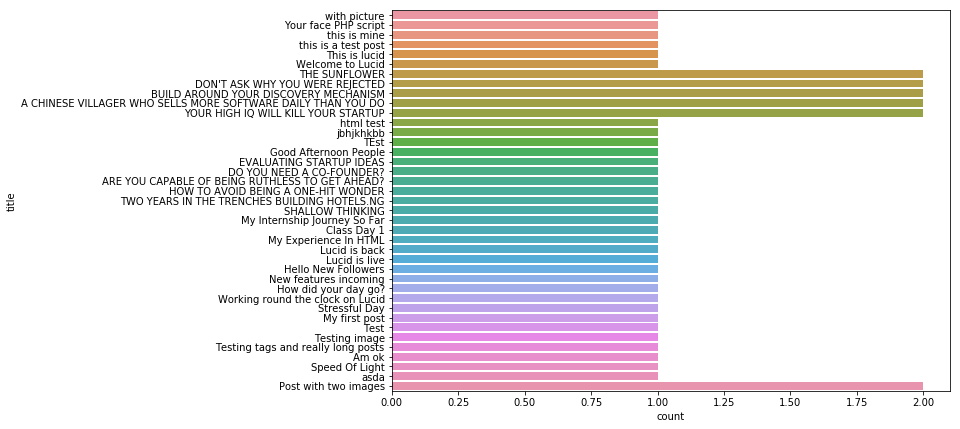

In [56]:
plt.figure(figsize = (10,7))
sns.countplot(y='title',data=extfeeds)

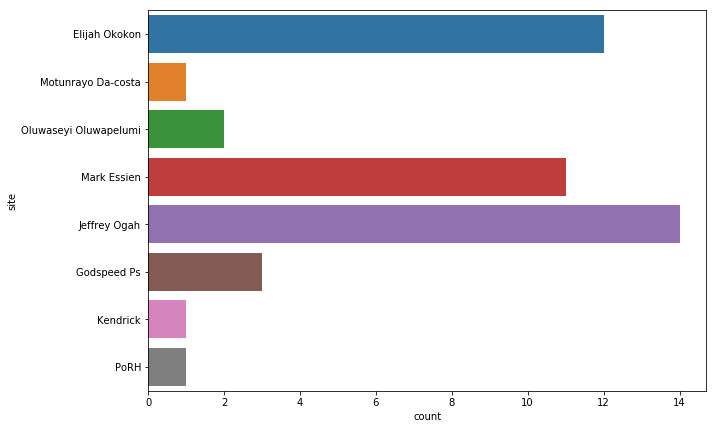

In [57]:
plt.figure(figsize = (10,7))
sns.countplot(y='site',data=extfeeds)

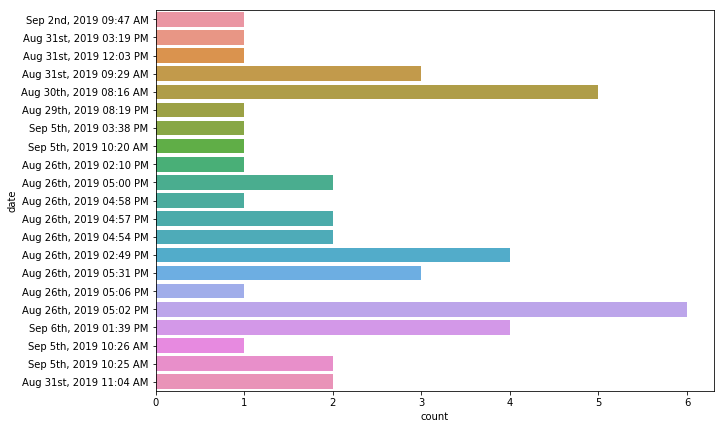

In [58]:
plt.figure(figsize = (10,7))
sns.countplot(y='date',data=extfeeds)

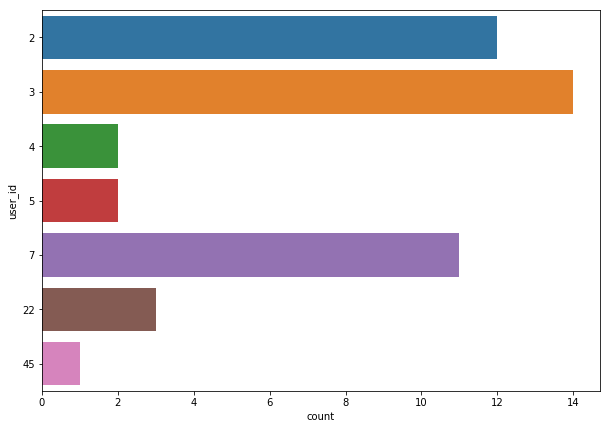

In [59]:
plt.figure(figsize = (10,7))
sns.countplot(y='user_id',data=extfeeds)

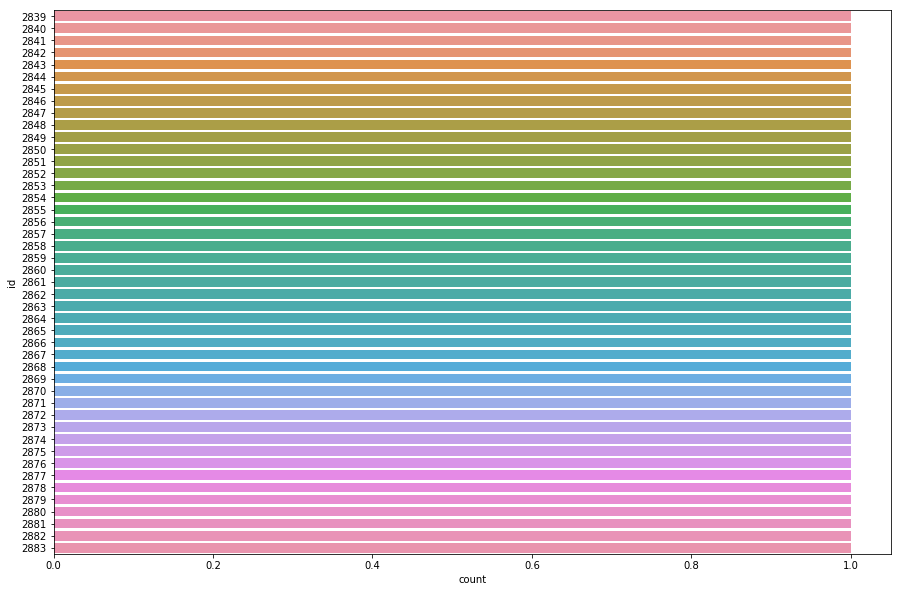

In [60]:
plt.figure(figsize = (15,10))
sns.countplot(y='id',data=extfeeds)

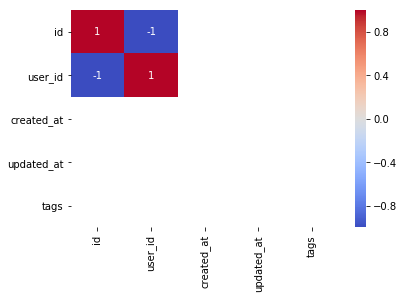

In [61]:
corr=extfeeds.corr()
sns.heatmap(corr.corr(),cmap='coolwarm',annot=True)

In [62]:
maillists.head()

,id,email,created_at,updated_at
0,1,ubarab85@live.com,NaN,NaN
1,2,detoun4med@gmail.com,NaN,NaN
2,3,emmanuel@gmail.com,NaN,NaN
3,4,ifydechu@gmail.com,NaN,NaN
4,5,olaiwolaahmod@gmail.com,NaN,NaN


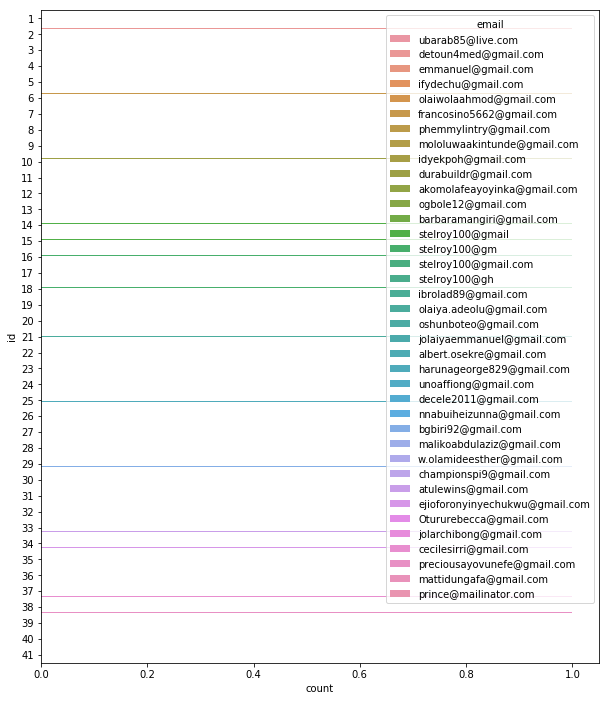

In [63]:
plt.figure(figsize = (10,12))
sns.countplot(y='id',hue ='email',data=maillists)

In [64]:
notificationsData.head()

,id,post_id,parent_comment_id,comment,sender_id,user_id,status,action,type,created_at,updated_at
0,1,NaN,NaN,NaN,4,7,1,Followed,Following,2019-08-26 08:43:56,2019-08-26 17:20:28
1,2,NaN,NaN,NaN,1,4,1,Followed,Following,2019-08-26 08:48:21,2019-08-26 12:05:42
2,3,NaN,NaN,NaN,3,45,0,Followed,Following,2019-08-26 08:51:39,2019-08-26 08:51:39
3,5,NaN,NaN,NaN,1,4,1,Followed,Following,2019-08-26 10:32:46,2019-08-26 12:05:42
4,7,278.0,NaN,Hey bro!,1,4,1,Commented,Post,2019-08-26 14:13:17,2019-08-26 14:13:25


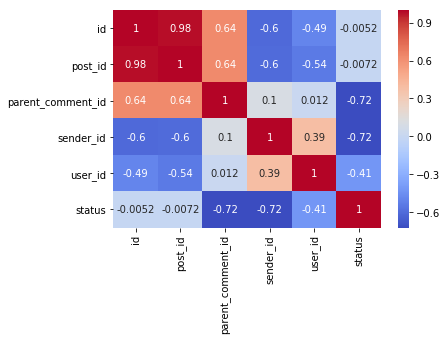

In [65]:
corr=notificationsData.corr()
sns.heatmap(corr.corr(),cmap='coolwarm',annot=True)

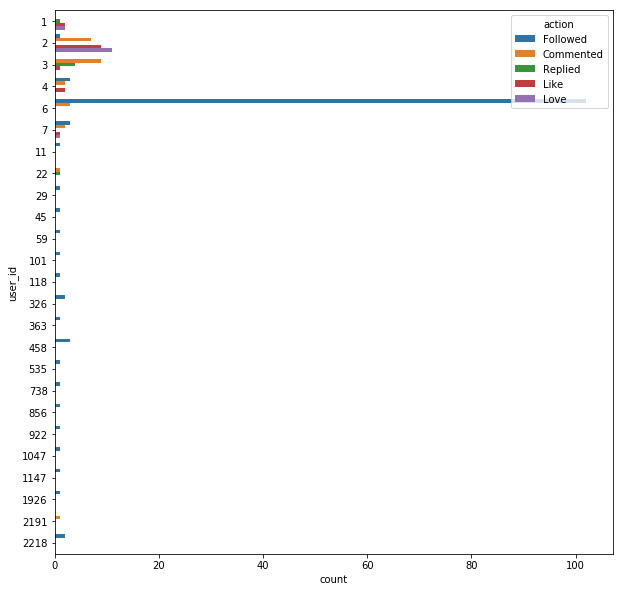

In [66]:
plt.figure(figsize = (10,10))
sns.countplot(y='user_id',hue ='action',data=notificationsData)

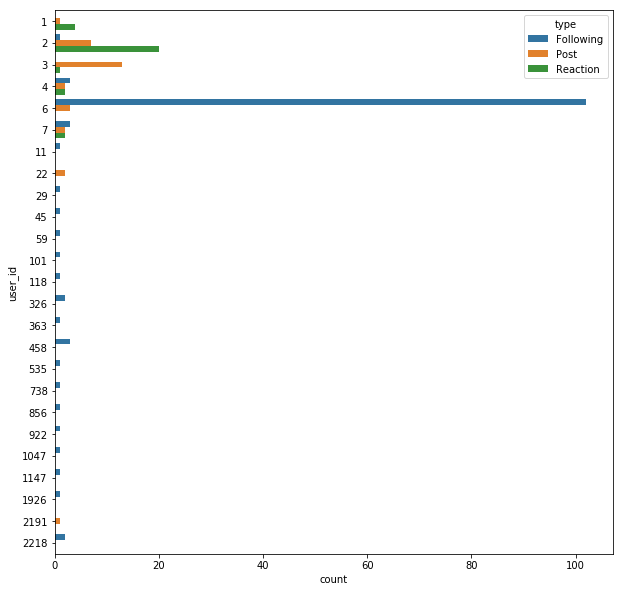

In [67]:
plt.figure(figsize = (10,10))
sns.countplot(y='user_id',hue ='type',data=notificationsData)

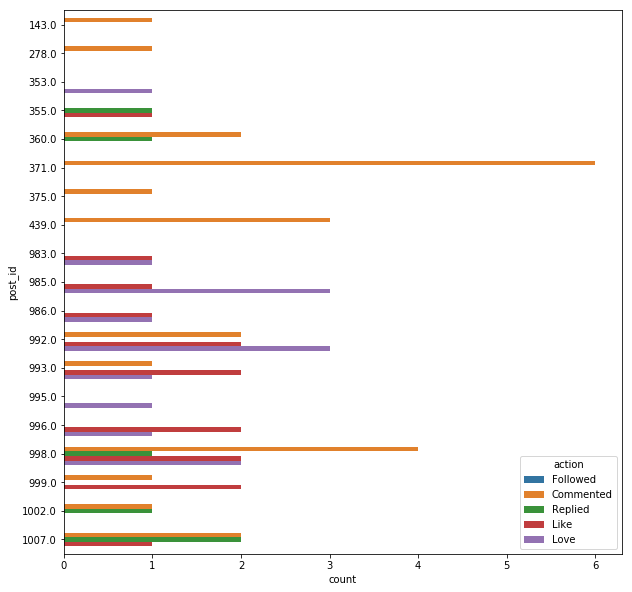

In [68]:
plt.figure(figsize = (10,10))
sns.countplot(y='post_id',hue ='action',data=notificationsData)

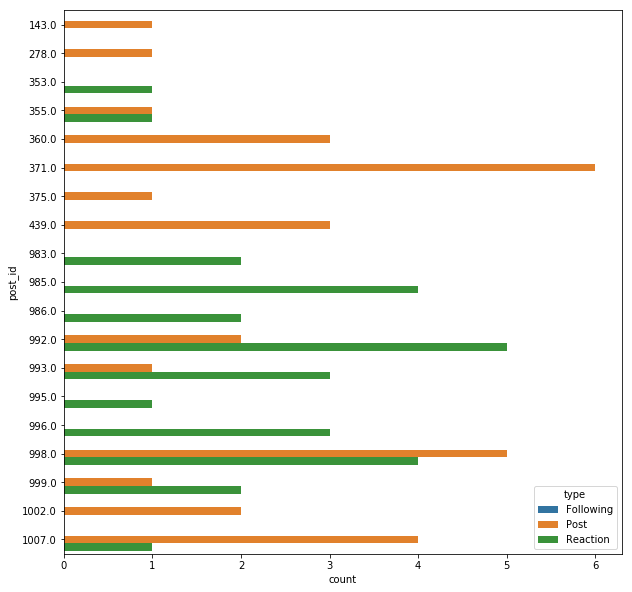

In [69]:
plt.figure(figsize = (10,10))
sns.countplot(y='post_id',hue ='type',data=notificationsData)

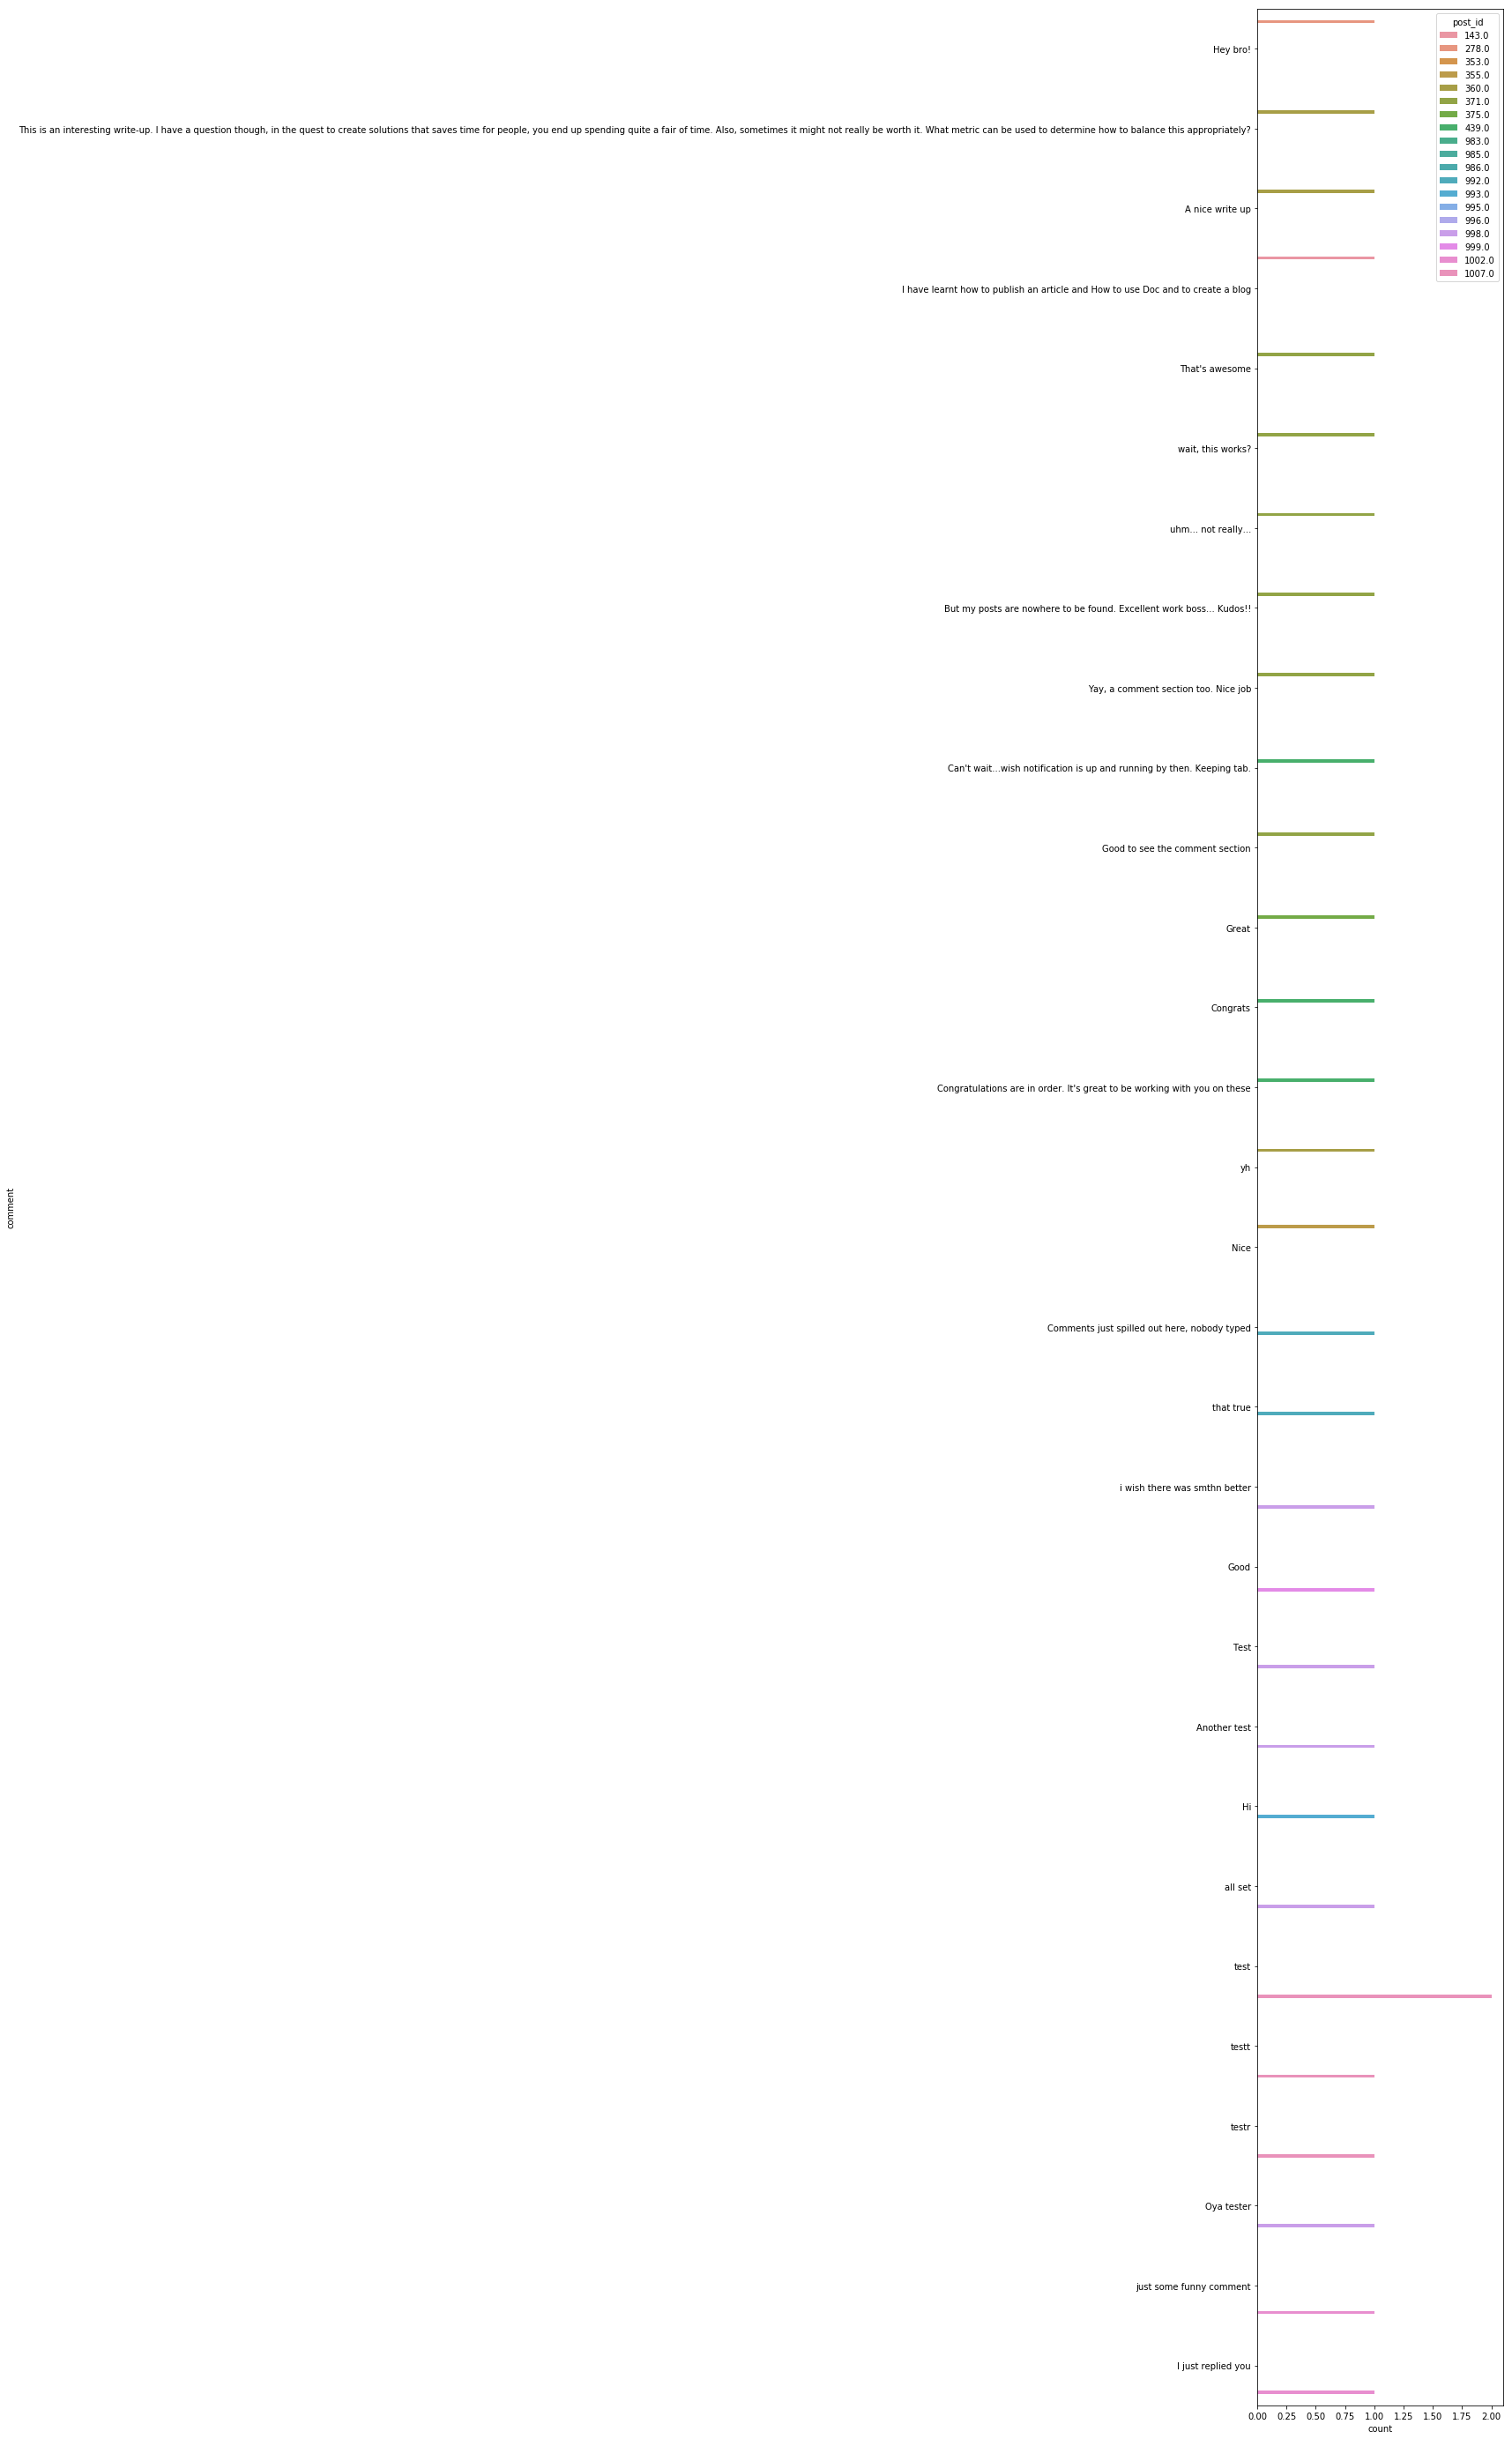

In [70]:
plt.figure(figsize = (5,50))
sns.countplot(y='comment',hue ='post_id',data=notificationsData)

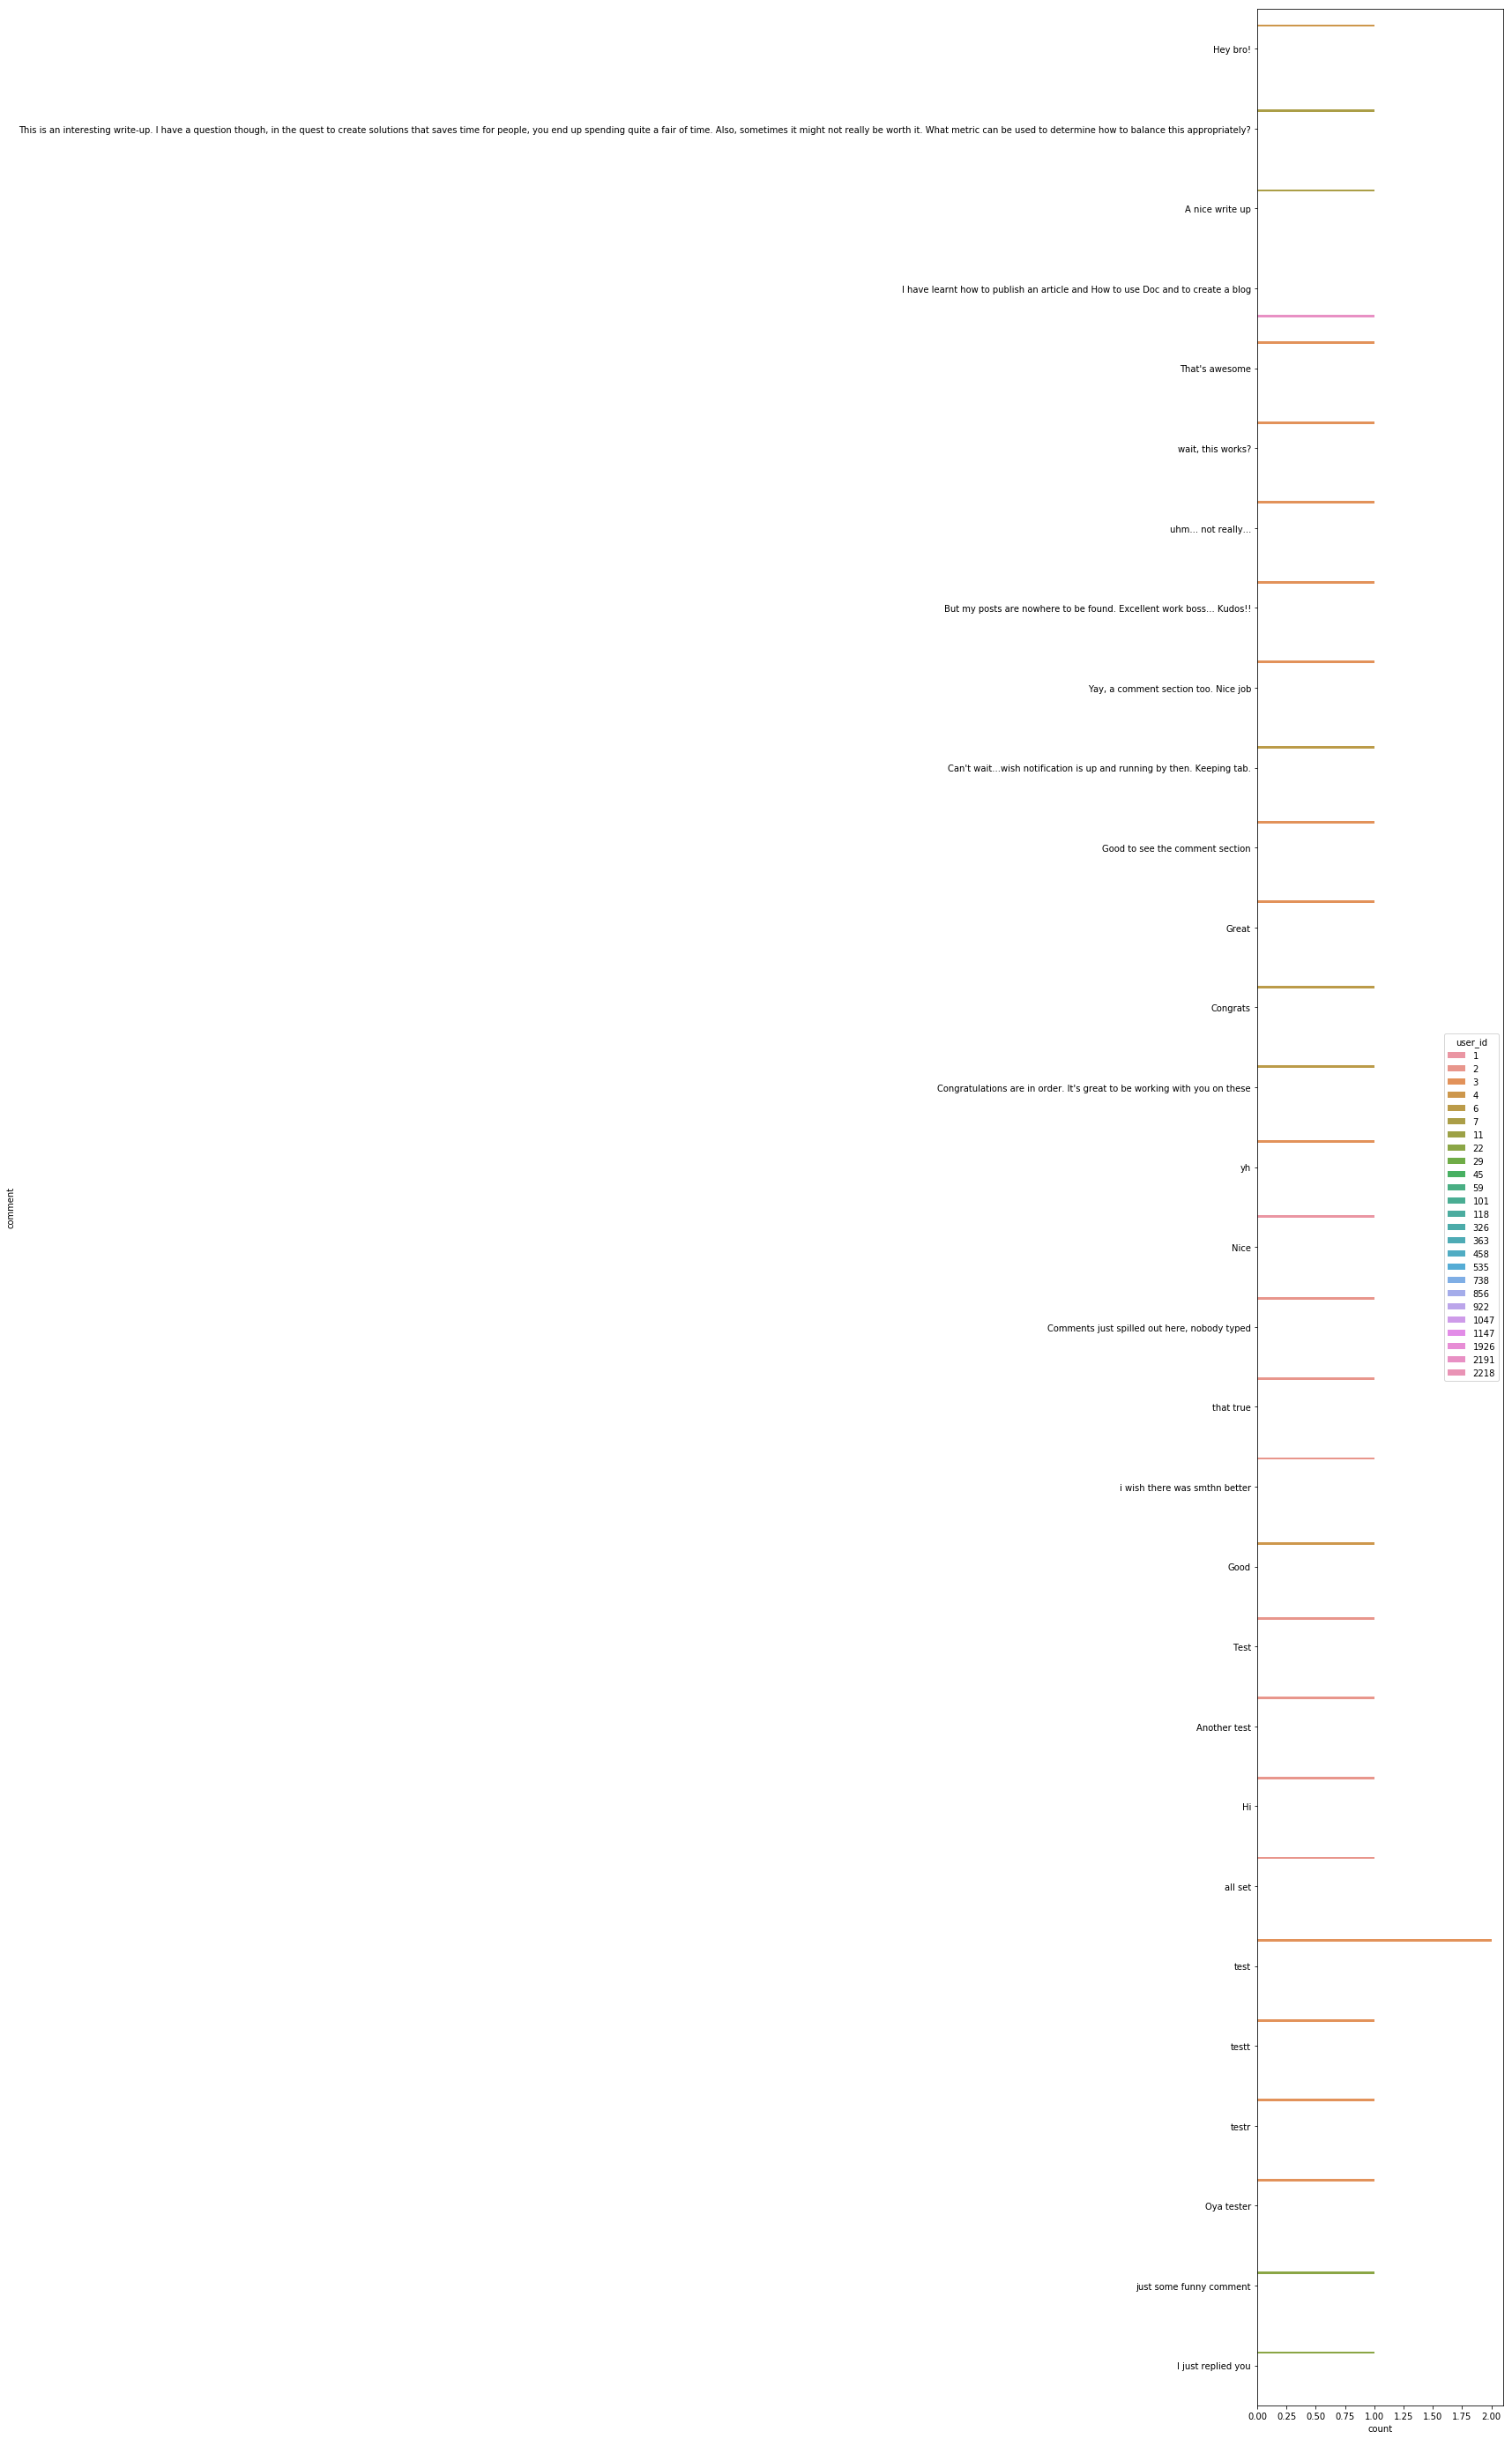

In [71]:
plt.figure(figsize = (5,50))
sns.countplot(y='comment',hue ='user_id',data=notificationsData)

In [72]:
thoughts.head()

,id,user_id,content,created_at,updated_at
0,1,2195,hhhhhhhh,2019-08-26 12:30:26,2019-08-26 12:30:26
1,2,148,Can't believe I'm learning ML,2019-08-26 12:57:35,2019-08-26 12:57:35
2,3,2212,- what you have learned so far\r\nI've learned...,2019-08-26 13:35:41,2019-08-26 13:35:41
3,4,1,Hey people,2019-08-26 14:12:07,2019-08-26 14:12:07
4,5,2223,nice,2019-08-26 14:24:55,2019-08-26 14:24:55


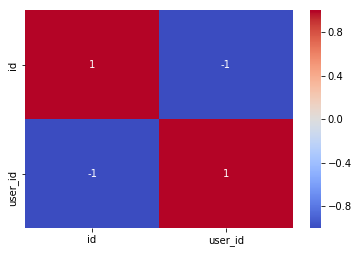

In [73]:
corr=thoughts.corr()
sns.heatmap(corr.corr(),cmap='coolwarm',annot=True)

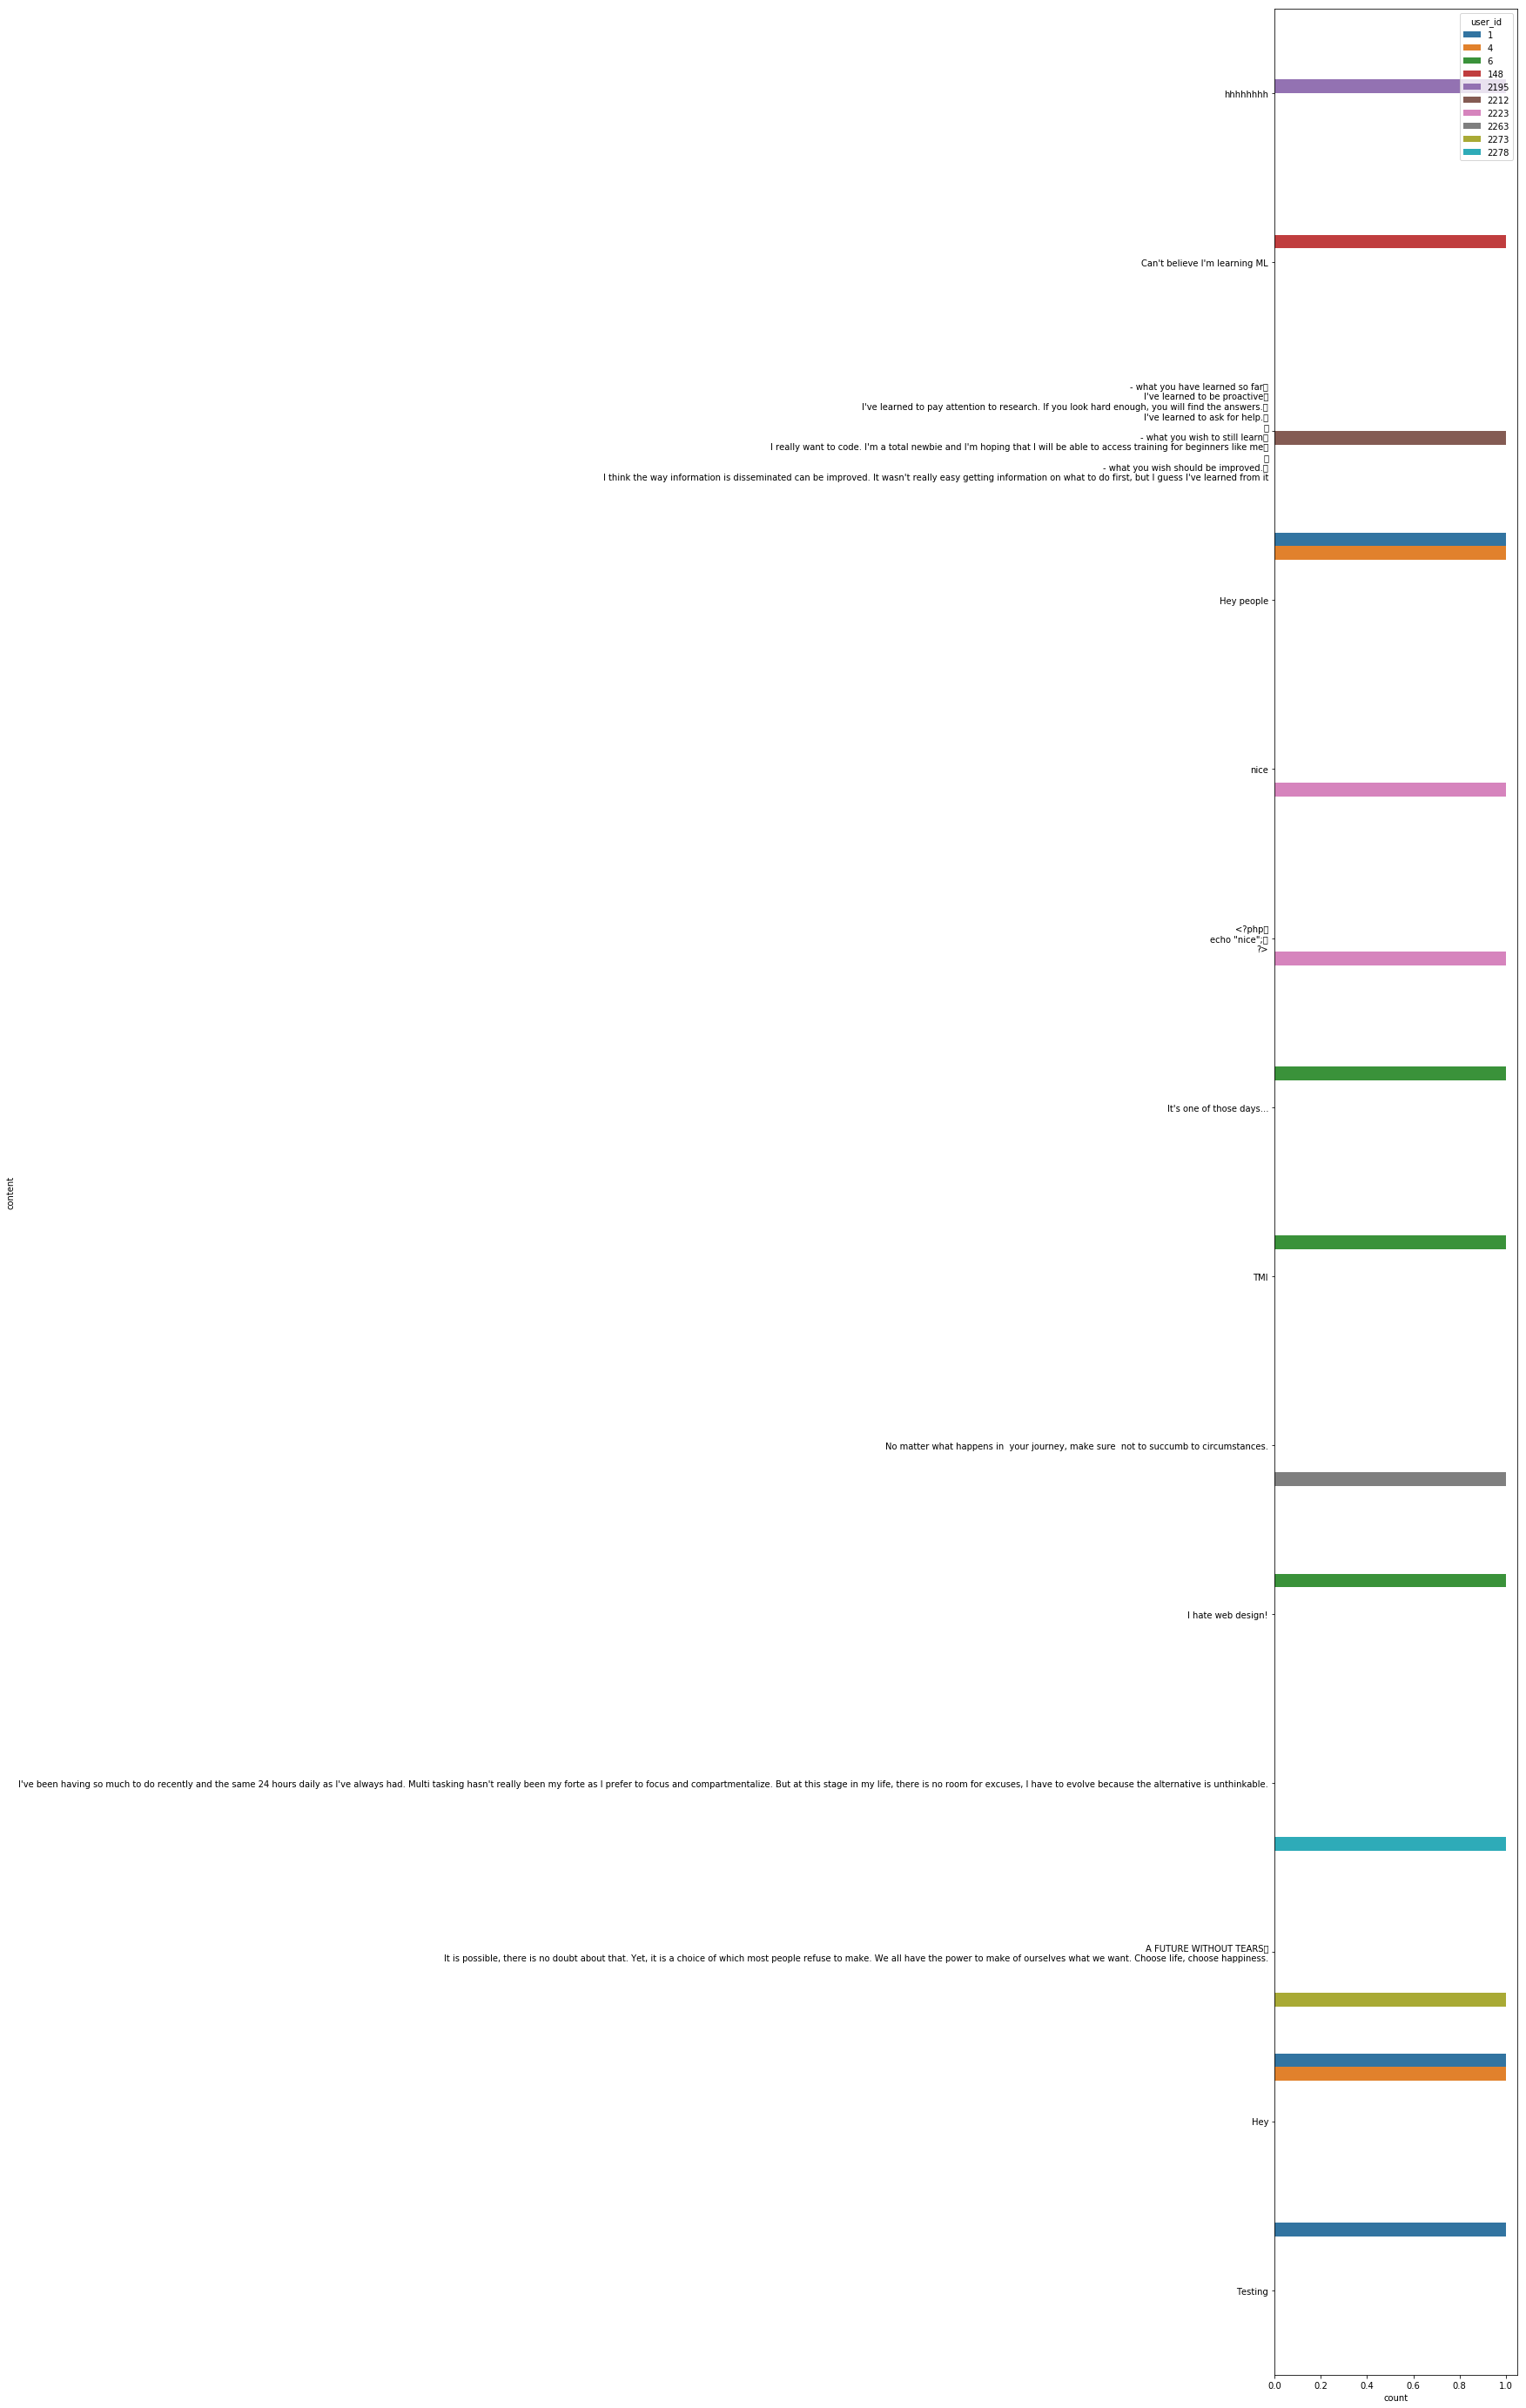

In [74]:
plt.figure(figsize = (5,50))
sns.countplot(y='content',hue ='user_id',data=thoughts)

In [75]:
ratings = 'https://raw.githubusercontent.com/Nedu/RecommenderSystemTeamJava/master/data/ratings.csv'
ratings = pd.read_csv(ratings)
ratings

# creating a new column with indexes to ease the process of creating our training data
ratings = ratings.reset_index(drop=True)
ratings['List Index'] = ratings.index
readers_group = ratings.groupby("user_id")
ratings

total = []

for userID, curReader in readers_group:
        temp = np.zeros(len(ratings))

        for num, notif in curReader.iterrows():
            
            temp[notif['List Index']] = notif['eventStrength'] / 5.0

        total.append(temp)
total

[array([0.8, 0.8, 0.8, 0.6, 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.8, 0.8, 0.6, 0.6, 0.8, 1. , 0.8, 1. ,
        0.6, 0.8, 0.8, 0.6, 0.8, 0.8, 0.6, 1. , 1. , 0.8, 1. , 0.8, 0.6,
        0.8, 0.6, 0.6, 0.6, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.8, 1. , 0.6, 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 0.8, 0.8, 0.8, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0

In [76]:
# Dividing the total data into train and validation sets
random.shuffle(total)
print("total size of the data is: {0}".format(len(total)))

train = total[:4]
valid = total[4:]
print("size of the training data is: {0}".format(len(train)))
print("size of the validation data is: {0}".format(len(valid)))

print("Setting the models Parameters")
hiddenUnits = 64
visibleUnits = len(ratings)

total size of the data is: 8
size of the training data is: 4
size of the validation data is: 4
Setting the models Parameters


In [77]:
vb = tf.placeholder(tf.float32, [visibleUnits])
# Number of features were going to learn
hb = tf.placeholder(tf.float32, [hiddenUnits])
W = tf.placeholder(tf.float32, [visibleUnits, hiddenUnits])  # Weight Matrix


print("Phase 1: Input Processing")
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)  # Visible layer activation
# Gibb's Sampling
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

print("Phase 2: Reconstruction")
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) +
                    vb)  # Hidden layer activation
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

print("Setting RBM Training Parameters")
# Learning rate
alpha = 0.6

print("Creating the gradients")
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

# Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

# Set the error function, here we use Mean Absolute Error Function
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

""" Initialize our Variables with Zeroes using Numpy Library """
# Current weight
cur_w = np.random.normal(loc=0, scale=0.01, size=[visibleUnits, hiddenUnits])

# Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)

# Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)

print("Running the session")
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

Phase 1: Input Processing
Phase 2: Reconstruction
Setting RBM Training Parameters
Creating the gradients
Running the session


In [0]:
def free_energy(v_sample, W, vb, hb):
    ''' Function to compute the free energy '''
    wx_b = np.dot(v_sample, W) + hb
    vbias_term = np.dot(v_sample, vb)
    hidden_term = np.sum(np.log(1 + np.exp(wx_b)), axis = 1)
    return -hidden_term - vbias_term

In [79]:
# Training RBM with 80 Epochs, with Each Epoch using batch size of 100.
# After training print out the error with epoch number.
print("Starting the training process")
epochs = 80
batchsize = 100
errors = []
energy_train = []
energy_valid = []

Starting the training process


In [80]:
for i in range(epochs):
    for start, end in zip(range(0, len(train), batchsize), range(batchsize, len(train), batchsize)):
        batch = train[start:end]
        cur_w = sess.run(update_w, feed_dict={
                         v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        print(cur_w)
        cur_vb = sess.run(update_vb, feed_dict={
                          v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={
                          v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb

    energy_train.append(np.mean(free_energy(train, cur_w, cur_vb, cur_hb)))
#     print("Epoch: {0}, free energy: {1}".format(i, energy_train[i]))
    energy_valid.append(np.mean(free_energy(valid, cur_w, cur_vb, cur_hb)))

    errors.append(sess.run(err_sum, feed_dict={
                  v0: train, W: cur_w, vb: cur_vb, hb: cur_hb}))
    if i % 10 == 0:
        print("Error in epoch {0} is: {1}".format(i, errors[i]))

Error in epoch 0 is: 0.5131666660308838
Error in epoch 10 is: 0.4956666827201843
Error in epoch 20 is: 0.5515000224113464
Error in epoch 30 is: 0.5115000009536743
Error in epoch 40 is: 0.5723333358764648
Error in epoch 50 is: 0.48733335733413696
Error in epoch 60 is: 0.476500004529953
Error in epoch 70 is: 0.4598333239555359


In [0]:
# This is the input that we need to provide manually, that is the user number
user = 3
inputUser = [train[user]]

# Feeding in the User and Reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

# Similar Post Content Based Recommender




In [82]:
# clean up content
postsData['content'] = postsData['content'].str.replace(r'<[^>]*>', '')
postsData['content'] = postsData['content'].str.replace(r'\s', ' ')
postsData['content'] = postsData['content'].str.replace(r'\\', ' ')
postsData['content'] = postsData['content'].str.replace(r'\~', ' ')
postsData['content'] = postsData['content'].str.replace(r'\[.*?\]', '')
postsData['content'] = postsData['content'].str.replace(r'\(.*?\)', '')
postsData['content'].head()

0    I learnt how to use the table tag as i have us...
1     I am on this journey with start.ng, and here ...
2    I have not been attending classes on the HNG c...
3    My journey on **StartNG** pre-internship progr...
4     A Summary on The “idongesit.html” CV, Its Str...
Name: content, dtype: object

In [83]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf_post = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
postsData['content'] = postsData['content'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_post_matrix = tfidf_post.fit_transform(postsData['content'])

#Output the shape of tfidf_matrix
tfidf_post_matrix.shape

(876, 4597)

In [0]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_post_matrix, tfidf_post_matrix)

In [0]:
#Construct a reverse map of indices and posts titles
indices_post = pd.Series(postsData.index, index=postsData['title']).drop_duplicates()

In [0]:
# Function that takes in post title as input and outputs most similar posts
def get_article_recommendations_for_user(title, cosine_sim=cosine_sim):
    # Get the index of the post that matches the title
    idx = indices_post[title]

    # Get the pairwsie similarity scores of all posts with that post
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the posts based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar posts
    sim_scores = sim_scores[1:11]

    # Get the post indices
    post_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar posts
    return postsData['title'].iloc[post_indices]

In [0]:
# currentPost = 'What i have learnt so far on HTML'
# recommendSimilarPosts = get_article_recommendations_for_user('What i have learnt so far on HTML')

# FOLLOWER RECOMMENDER

In [88]:
userData.columns

Index(['id', 'name', 'username', 'email', 'image', 'provider', 'provider_id',
       'password', 'remember_token', 'created_at', 'updated_at', 'short_bio'],
      dtype='object')

In [89]:
userData.drop(labels=['image', 'provider', 'provider', 'provider_id', 'password', 'remember_token', 'created_at', 'updated_at'], axis=1, inplace=True )
userData.head(10)

,id,name,username,email,short_bio
0,1,Eniayomi Oluwaseyi,eniayomi,oluwaseyieniayomi@gmail.com,Software Developer | DevOPs Engineer
1,2,Elijah Okokon,DMatrix,okoelijah@gmail.com,Web Developer
2,3,Jeffrey Ogah,jeff.ogah,jeff.ogah@gmail.com,Front End Developer | React Developer | Mentor...
3,4,Oluwaseyi Oluwapelumi,nathan,nathanoluwaseyi@gmail.com,| Software Developer | DevOps Engineer | @linu...
4,5,PoRH,lamar,paulchibiukeigweze@gmail.com,I Am lamar and you don't think am real?
5,6,Seyi Onifade,xyluz,hngtechapps@gmail.com,My Open Diary
6,7,Mark Essien,markessien,markessien@gmail.com,An engineer
7,8,Alex Moses,ahlesswywk,ahlesswywk@gmail.com,"Software Developer hotelsng, Ex. Frontend deve..."
8,9,Edmund Ekott,26th_edmund,edmund.timfon@gmail.com,Front-end Engineer 💻 | FIFA advocate 🎮 | Ninja 🥋
9,10,Stefan aGz,stefanpongrz,stefanpongrz@gmail.com,Here


In [90]:
userData.shape

(2293, 5)

In [91]:
userData['short_bio'].head(5)

0                 Software Developer | DevOPs Engineer
1                                        Web Developer
2    Front End Developer | React Developer | Mentor...
3    | Software Developer | DevOps Engineer | @linu...
4              I Am lamar and you don't think am real?
Name: short_bio, dtype: object

In [92]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Replace NaN with an empty string
userData['short_bio'] = userData['short_bio'].fillna('')
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(userData['short_bio'])
#Output the shape of tfidf_matrix
# this produces the number of different words used by user in the short_bio
tfidf_matrix.shape

(2293, 2242)

In [0]:
# Compute the cosine similarity matrix
consine_sim = linear_kernel(tfidf_matrix, tfidf_matrix, True)
#Construct a reverse map of indices and user name
indices = pd.Series(userData.index, index=userData['id'])

In [0]:
def create_new_db(x):
    """
    this function takes the result from get_followers and transforms to a DB with other info
    paramx: recommendation Series
    """
    y = x.copy()
    z = x.copy()
    y.update(userData['name'])
    z.update(userData['short_bio'])
    xdf=pd.DataFrame(x)
    ydf=pd.DataFrame(y)
    zdf=pd.DataFrame(z)
    ydf.rename(columns={'id':'Name'}, inplace=True)
    xdf.rename(columns={'id':'User_Id'}, inplace=True)
    zdf.rename(columns={'id':'short_bio'}, inplace=True)
    frames = [xdf,ydf,zdf]
    new_df = pd.concat(frames, axis=1)
    new_df.set_index('User_Id', inplace=True)
    return new_df

In [0]:
# Function that takes in user name as input and outputs most similar users
def get_followers(id, consine_sim=consine_sim):
    # Get the index of the users that matches the user
    idx = indices[id]
    # Get the pairwsie similarity scores of all users with that user
    sim_scores = list(enumerate(consine_sim[idx]))
    # Sort the users based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar users
    sim_scores = sim_scores[1:11]
     # Get the user indices
    follow_indices = [i[0] for i in sim_scores]
      # Return the top 10 most similar user
    follower_id = userData['id'].iloc[follow_indices]
    # Create a new data frame containing the user id and name 
    follower_rec = create_new_db(follower_id)
    return follower_rec

In [0]:
# Use this function to get details of the user with their user id
def check_user(id):
    name = userData.loc[userData['id'] == id, 'name']
    bio = userData.loc[userData['id'] == id, 'short_bio']
    return name.iloc[0], bio.iloc[0]

In [97]:
check_user(23)

('Oluwatomisin Lalude', 'Web Developer')

In [98]:
# Run Get_followers with user id as input
get_followers(23)

,Name,short_bio
User_Id,,
23,Oluwatomisin Lalude,Web Developer
66,Kev Chike,Web Developer
78,Emmanuel Ezenwigbo,Web developer
338,Stephen Oluwafemi,Web Developer
362,Hafizah Muhyideen,I am a web developer
725,Tochukwu Nwosu,I am a Web Developer
857,benjamin chibuzor,Web Developer
1012,OMIDIORA EMMANUEL,Web Developer
1167,Ogunjuyigbe Oluwaseyi,Web developer


In [99]:
userData.loc[userData['id'] == 23, 'short_bio'].iloc[0]

'Web Developer'

# Recommendation Engine

In [100]:
# Creating recommendation score for posts in our data
ratings["Recommendation Score"] = rec[0]
ratings

""" Recommend User what posts he has not interacted with yet """
# Find the mock user's user_id from the data
cur_user_id = ratings.iloc[user]['user_id']
print ('cur_user_id: ', cur_user_id)

# Find all posts the mock user has interacted with before
read_posts = ratings[ratings['user_id'] == cur_user_id]['post_id']

# converting the pandas series object into a list
read_posts_id = read_posts.tolist()

# getting the post title for the posts already interacted on by the user
read_posts_titles = []
for post in read_posts_id:
    read_posts_titles.append(
        postsData[postsData['id'] == post]['title'].tolist()[0])

# Find all posts the mock user has 'not' interacted before using the to_reads data
unread_posts = to_reads[to_reads['user_id'] == cur_user_id]['post_id']
unread_posts_id = unread_posts.tolist()

# extract the ratings of all the uninteracted posts from ratings dataframe
unread_with_score = ratings[ratings['post_id'].isin(unread_posts_id)]

# grouping the unread data on post id and taking the mean of the recommendation scores for each post_id
grouped_unread = unread_with_score.groupby('post_id', as_index=False)[
    'Recommendation Score'].mean()
grouped_unread

# getting the titles of the unread posts
unread_posts_titles = []
unread_posts_scores = []
for post in grouped_unread['post_id']:
    unread_books_names.append(
        postsData[postsData['post_id'] == post]['title'].tolist()[0])
    unread_books_scores.append(
        grouped_unread[grouped_unread['post_id'] == post]['Recommendation Score'].tolist()[0])

# creating a data frame for unread posts with their titles and recommendation scores
unread_posts_with_scores = pd.DataFrame({
    'post_name': unread_posts_titles,
    'score': unread_posts_scores
})
unread_posts_with_scores

# creating a data frame for read posts with the titles
read_posts_with_titles = pd.DataFrame({
    'post_name': read_posts_titles,
})

read_posts_with_titles

# sort the result in descending order of the recommendation score
sorted_result = unread_posts_with_scores.sort_values(
    by='score', ascending=False)

cur_user_id:  1.0
Empty DataFrame
Columns: [user_id, post_id, eventStrength, List Index, Recommendation Score]
Index: []


# Testing

In [0]:
samplePost = 'What i have learnt so far on HTML'
recommendSimilarPosts = get_article_recommendations_for_user(samplePost)

In [102]:
print('The current post read by the user is:', currentPost)

print('The posts recommended to the user based on similarity to the current post are:')
print(recommendSimilarPosts)

The posts read by the user are:
                             post_name
0                               second
1                                third
2  HOW TO AVOID BEING A ONE-HIT WONDER
3                                third
4                                third
The current post read by the user is: What i have learnt so far on HTML
The posts recommended to the user based on similarity to the current post are:
258                      WHAT I'VE LEARNT SO FAR
739                                       TASK 2
740                                       TASK 2
260                              HTML Experience
5                             My Journey on HTML
13                            What I done so far
284                           My First HTML Page
47     Task two of my Start.NG internship so far
276                                CV Using html
100                 What you have learned so far
Name: title, dtype: object
The posts recommended to the user are:
Empty DataFrame
Columns: [p

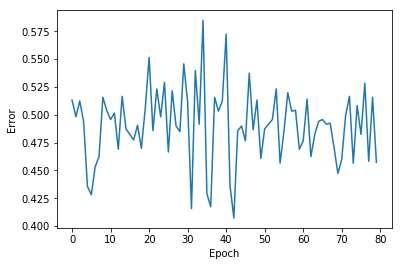

In [103]:
%matplotlib inline
# Saving the plots
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.savefig("error.png")
plt.show()

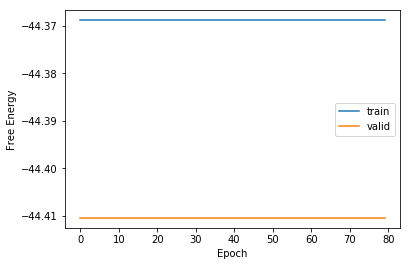

In [104]:
fig, ax = plt.subplots()
ax.plot(energy_train, label='train')
ax.plot(energy_valid, label='valid')
leg = ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Free Energy")
plt.savefig("free_energy.png")
plt.show()